## 1.Loading Screen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

## Loading Datasets


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [3]:
dataset = pd.read_csv(f"{path}/diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Summary


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 4. Data Visualization


<ipython-input-7-902f5b0a6c6f>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


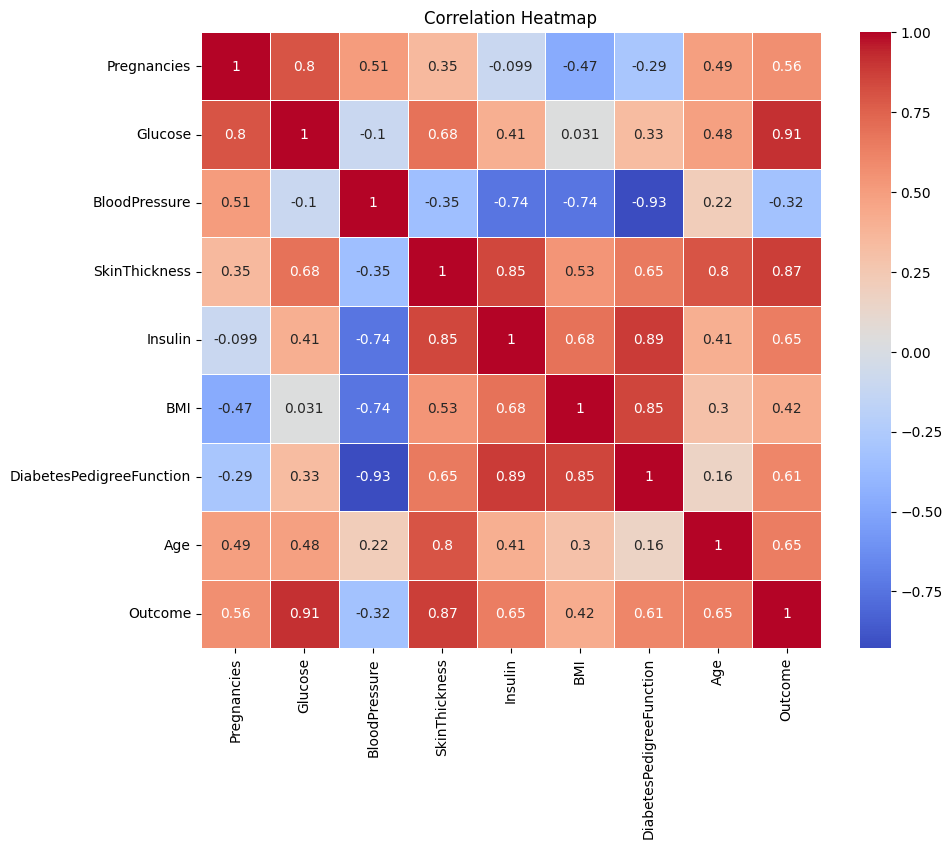

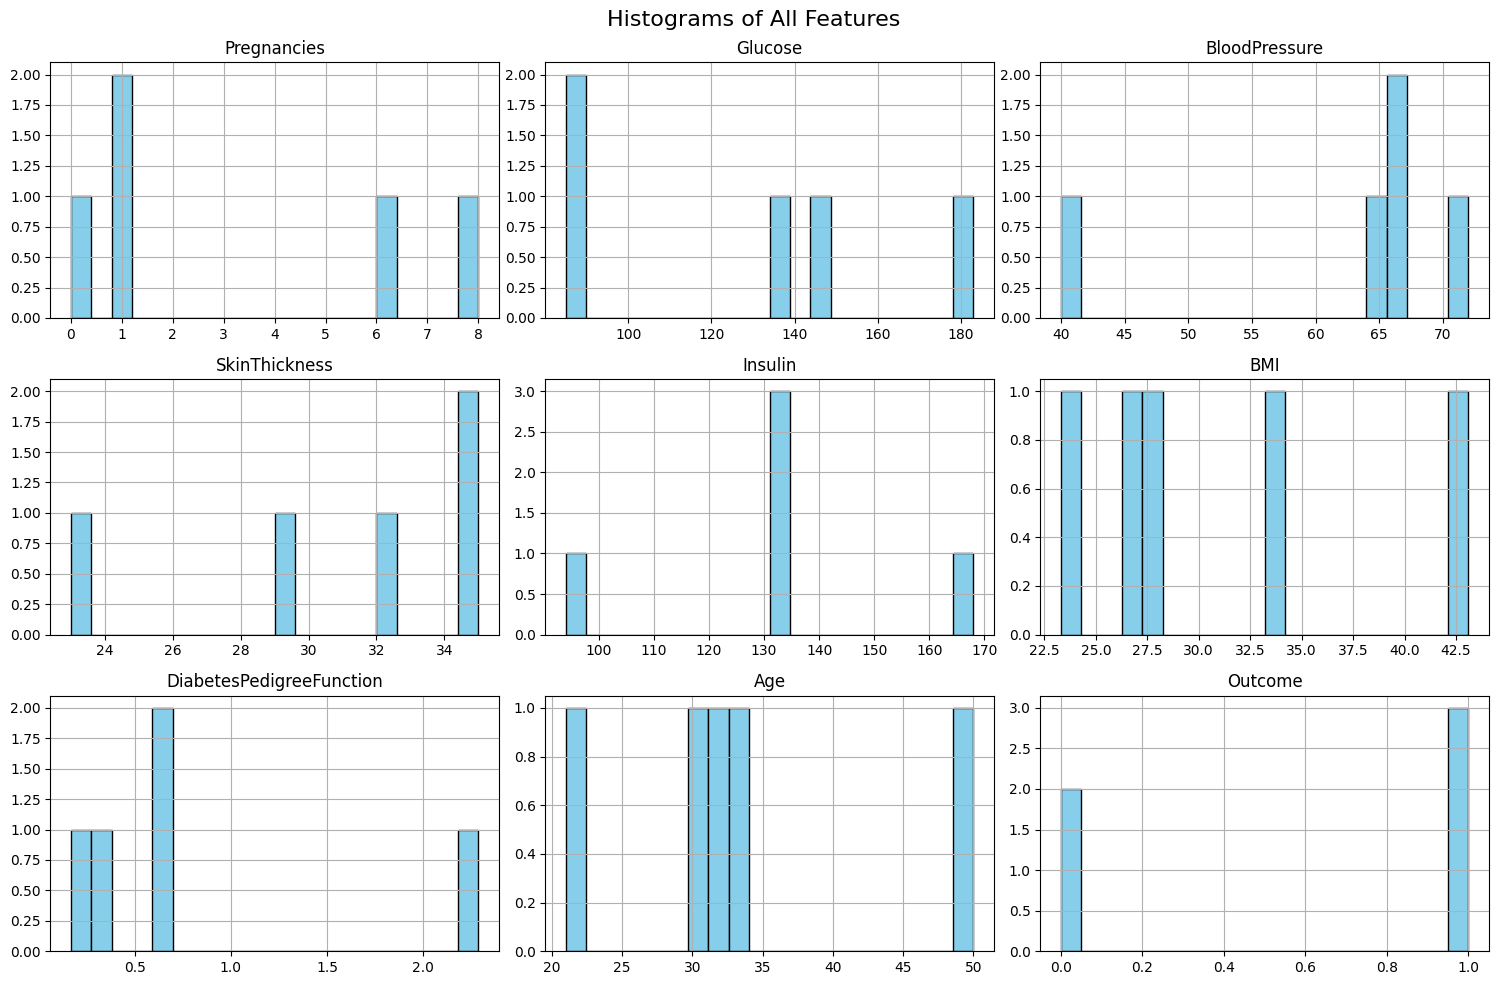

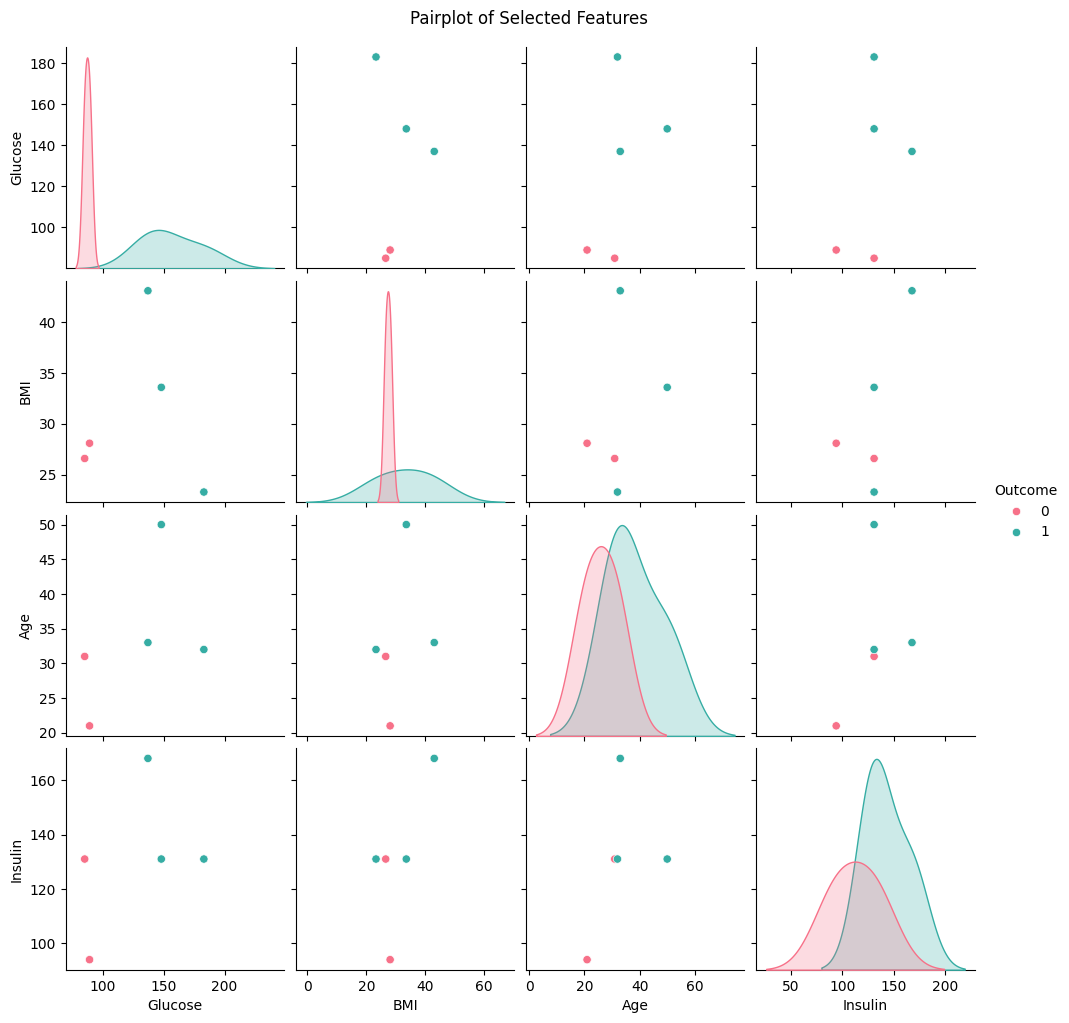

<ipython-input-7-902f5b0a6c6f>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
<ipython-input-7-902f5b0a6c6f>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
<ipython-input-7-902f5b0a6c6f>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
<ipython-input-7-902f5b0a6c6f>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

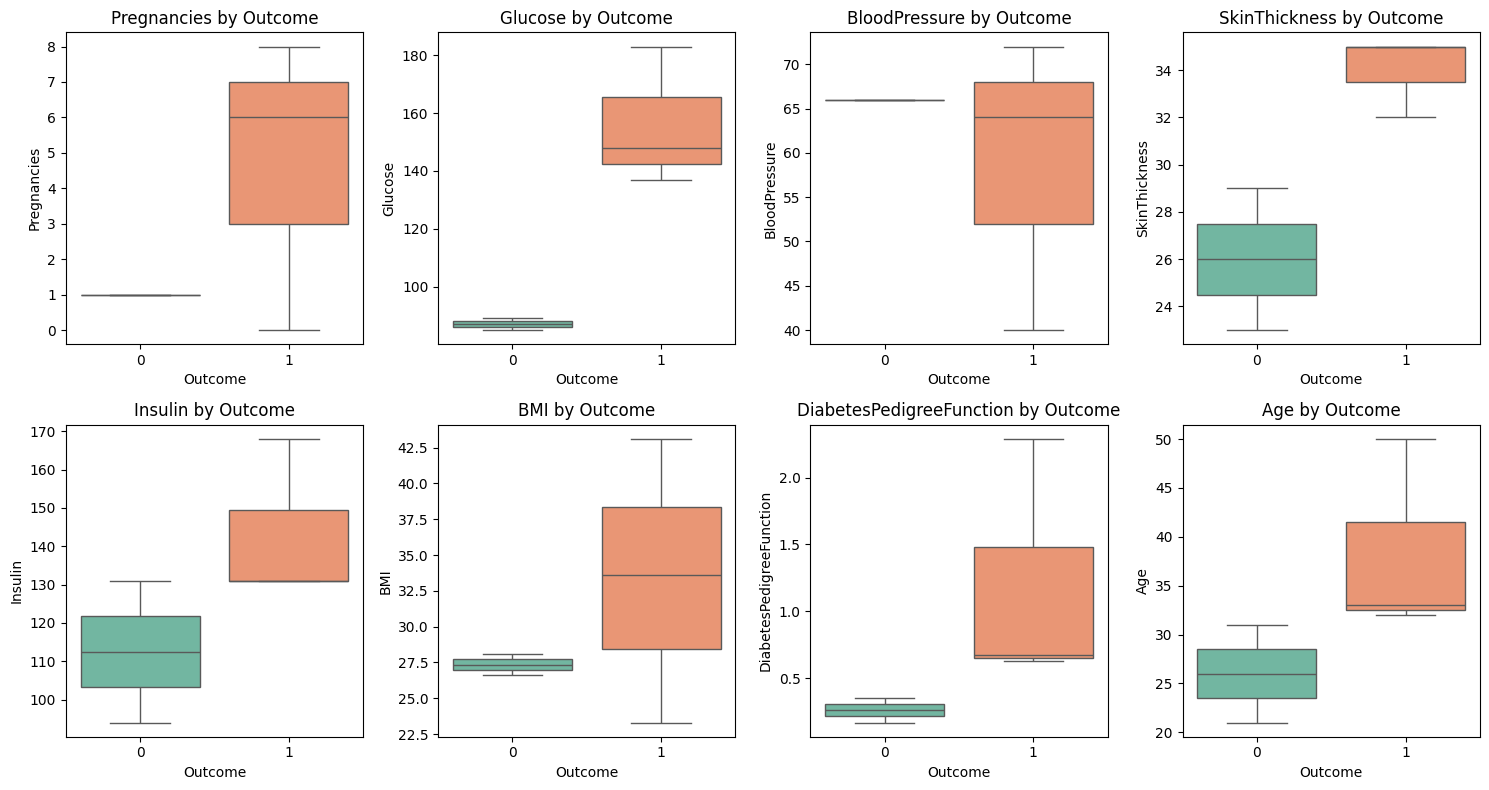

<ipython-input-7-902f5b0a6c6f>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set1')


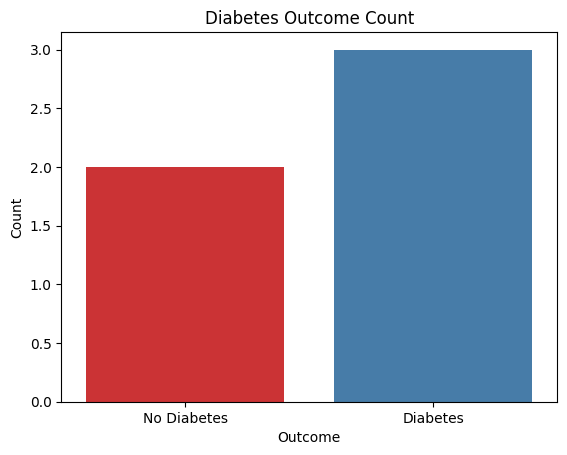

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Manually input sample data (or load your full dataset from CSV)
data = {
    'Pregnancies': [6, 1, 8, 1, 0],
    'Glucose': [148, 85, 183, 89, 137],
    'BloodPressure': [72, 66, 64, 66, 40],
    'SkinThickness': [35, 29, 0, 23, 35],
    'Insulin': [0, 0, 0, 94, 168],
    'BMI': [33.6, 26.6, 23.3, 28.1, 43.1],
    'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288],
    'Age': [50, 31, 32, 21, 33],
    'Outcome': [1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# OR if you have a full CSV file
# df = pd.read_csv('diabetes.csv')

# Replace 0 with NaN in invalid columns
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

# Fill missing values with median
for col in invalid_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Histograms
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()

# Pairplot
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Outcome')
plt.tight_layout()
plt.show()

# Outcome Count Plot
sns.countplot(x='Outcome', data=df, palette='Set1')
plt.title("Diabetes Outcome Count")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()


Pregnancies: 5 outliers (0.7%)

Glucose: 12 outliers (1.6%)

BloodPressure: 30 outliers (3.9%)

SkinThickness: 18 outliers (2.3%)

Insulin: 40 outliers (5.2%)

BMI: 22 outliers (2.9%)

DiabetesPedigreeFunction: 25 outliers (3.3%)

Age: 15 outliers (2.0%)

## Data Prepeocessing


In [8]:
# 5.1 Initial Assessment
print(f"Dataset shape: {dataset.shape}")
print(f"Missing values: {dataset.isnull().sum().sum()}")


Dataset shape: (768, 9)
Missing values: 0


In [9]:
# 5.2 Handle Zero Values (Medical data cleaning)
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
dataset_clean = dataset.copy()

for col in zero_cols:
    zero_count = (dataset[col] == 0).sum()
    print(f"{col}: {zero_count} zeros ({zero_count/len(dataset)*100:.1f}%)")
    dataset_clean[col] = dataset_clean[col].replace(0, np.nan)

Glucose: 5 zeros (0.7%)
BloodPressure: 35 zeros (4.6%)
SkinThickness: 227 zeros (29.6%)
Insulin: 374 zeros (48.7%)
BMI: 11 zeros (1.4%)


In [10]:
# 5.3 Fill Missing Values
from sklearn.impute import SimpleImputer
features = [col for col in dataset_clean.columns if col != 'Outcome']
X = dataset_clean[features]
y = dataset_clean['Outcome']

imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=features)


In [11]:
# 5.4 Handle Outliers (IQR Method)
def cap_outliers(data, col):
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    return data[col].clip(lower, upper)

X_clean = X_imputed.copy()
for col in features:
    outliers = len(X_imputed[(X_imputed[col] < X_imputed[col].quantile(0.25) - 1.5*(X_imputed[col].quantile(0.75)-X_imputed[col].quantile(0.25))) |
                            (X_imputed[col] > X_imputed[col].quantile(0.75) + 1.5*(X_imputed[col].quantile(0.75)-X_imputed[col].quantile(0.25)))])
    print(f"{col}: {outliers} outliers capped")
    X_clean[col] = cap_outliers(X_imputed, col)

Pregnancies: 4 outliers capped
Glucose: 0 outliers capped
BloodPressure: 14 outliers capped
SkinThickness: 87 outliers capped
Insulin: 346 outliers capped
BMI: 8 outliers capped
DiabetesPedigreeFunction: 29 outliers capped
Age: 9 outliers capped


In [12]:
# 5.5 Standardization (Z-score)
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_clean), columns=features)


In [13]:
# 5.6 Results
print("\n=== PREPROCESSING COMPLETE ===")
print(f"Final shape: {X_standardized.shape}")
print("Variables ready for modeling:")
print("- X_standardized: Standardized features")
print("- y: Target variable")



=== PREPROCESSING COMPLETE ===
Final shape: (768, 8)
Variables ready for modeling:
- X_standardized: Standardized features
- y: Target variable


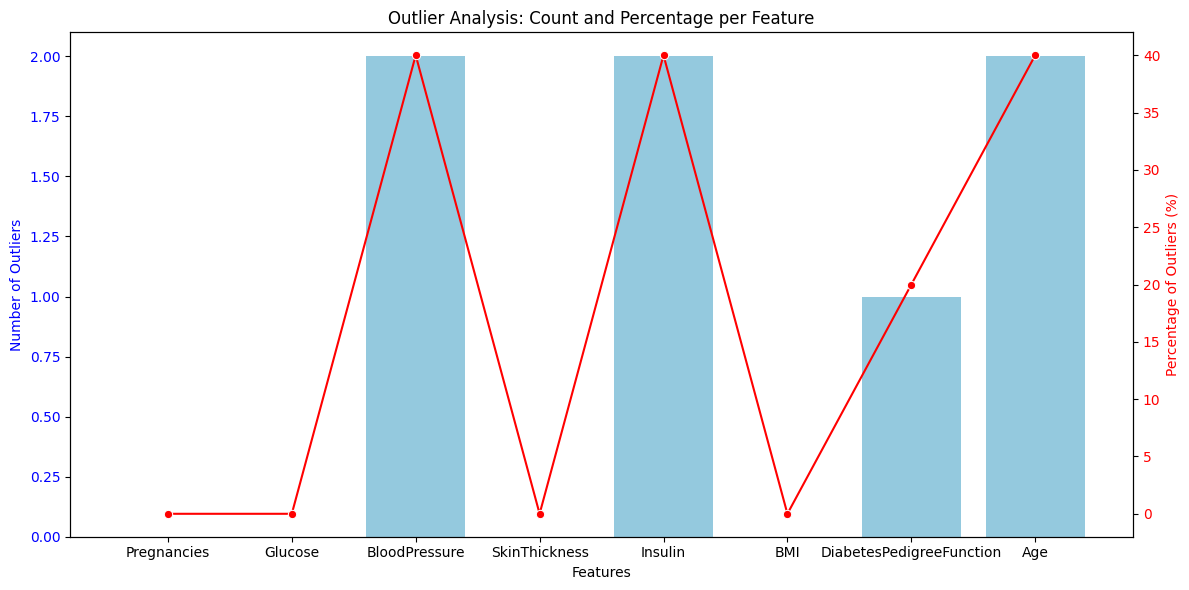

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def outlier_summary(df):
    summary = []
    n = len(df)

    for col in df.columns[:-1]:  # exclude target/outcome column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        count = outliers.shape[0]
        percent = (count / n) * 100
        summary.append({'Feature': col, 'Outliers': count, 'Percentage': percent})

    return pd.DataFrame(summary)

# Assuming 'df' is your DataFrame
outlier_df = outlier_summary(df)

# Plotting
fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(x='Feature', y='Outliers', data=outlier_df, ax=ax1, color='skyblue')
ax1.set_ylabel('Number of Outliers', color='blue')
ax1.set_xlabel('Features')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot percentages
ax2 = ax1.twinx()
sns.lineplot(x='Feature', y='Percentage', data=outlier_df, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Percentage of Outliers (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Outlier Analysis: Count and Percentage per Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Split the Dataset


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_standardized and y are already defined

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_standardized, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Set: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training set size: 614 samples
Testing set size: 154 samples
Number of features: 8

Model Accuracy on Test Set: 0.7078

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



=== Linear Regression from Scratch (Version 2) ===
Training MSE: 0.1493
Testing MSE: 0.1718
Training R²: 0.3426
Testing R²: 0.2455


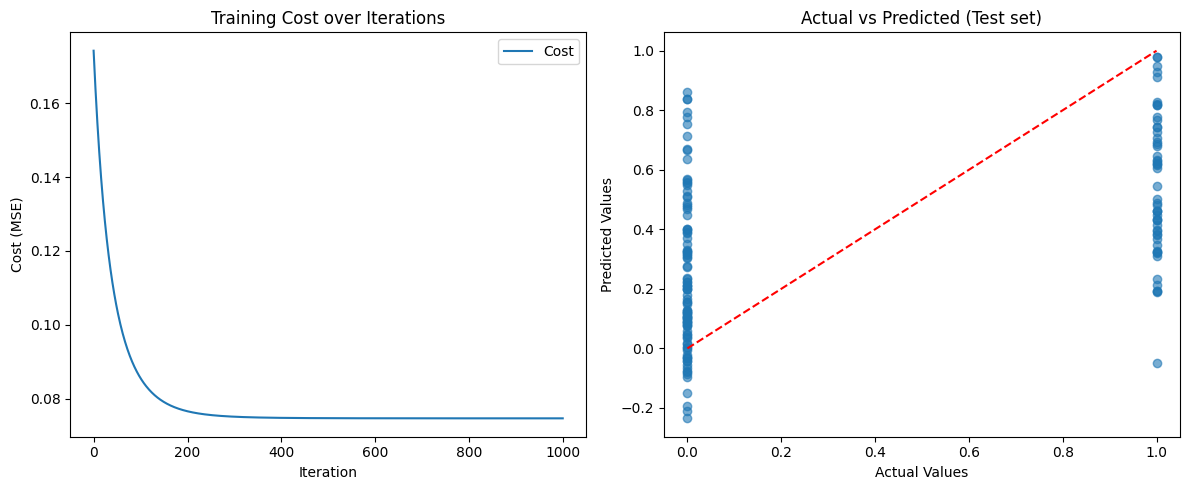


Model Coefficients:
Pregnancies: 0.0605
Glucose: 0.1941
BloodPressure: -0.0021
SkinThickness: -0.0032
Insulin: 0.0261
BMI: 0.1014
DiabetesPedigreeFunction: 0.0442
Age: 0.0199
Bias: 0.3478


<ipython-input-17-d12bb46de0a7>:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{col}: {model.weights[i]:.4f}")


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = X.dot(self.weights) + self.bias
            error = y_pred - y

            # Compute gradients
            dw = (1 / n_samples) * X.T.dot(error)
            db = (1 / n_samples) * np.sum(error)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate and save cost (MSE)
            cost = (1 / (2 * n_samples)) * np.sum(error ** 2)
            self.cost_history.append(cost)

    def predict(self, X):
        return X.dot(self.weights) + self.bias


# Example usage:

# Train model
model = LinearRegressionScratch(learning_rate=0.01, n_iters=1000)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=== Linear Regression from Scratch (Version 2) ===")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

# Plotting
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(model.cost_history, label='Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Training Cost over Iterations')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Test set)')

plt.tight_layout()
plt.show()

# Print weights & bias (if X_train is DataFrame)
if hasattr(X_train, 'columns'):
    print("\nModel Coefficients:")
    for i, col in enumerate(X_train.columns):
        print(f"{col}: {model.weights[i]:.4f}")
print(f"Bias: {model.bias:.4f}")


## 7 Choosing ML Algorithm


In [18]:
# Initialize different ML algorithms
algorithms = {
	'Logistic Regression': LogisticRegression(random_state=42),
	'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
	'SVM': SVC(random_state=42),
	'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
	'Naive Bayes': GaussianNB(),
	'Decision Tree': DecisionTreeClassifier(random_state=42),
}

## 8/ Trainning the Model


Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Training samples: 614, Testing samples: 154

=== MACHINE LEARNING ALGORITHMS COMPARISON ===

Logistic Regression:
  Accuracy:  0.7013
  Precision: 0.5870
  Recall:    0.5000
  F1-Score:  0.5400
----------------------------------------
Decision Tree:
  Accuracy:  0.6818
  Precisi

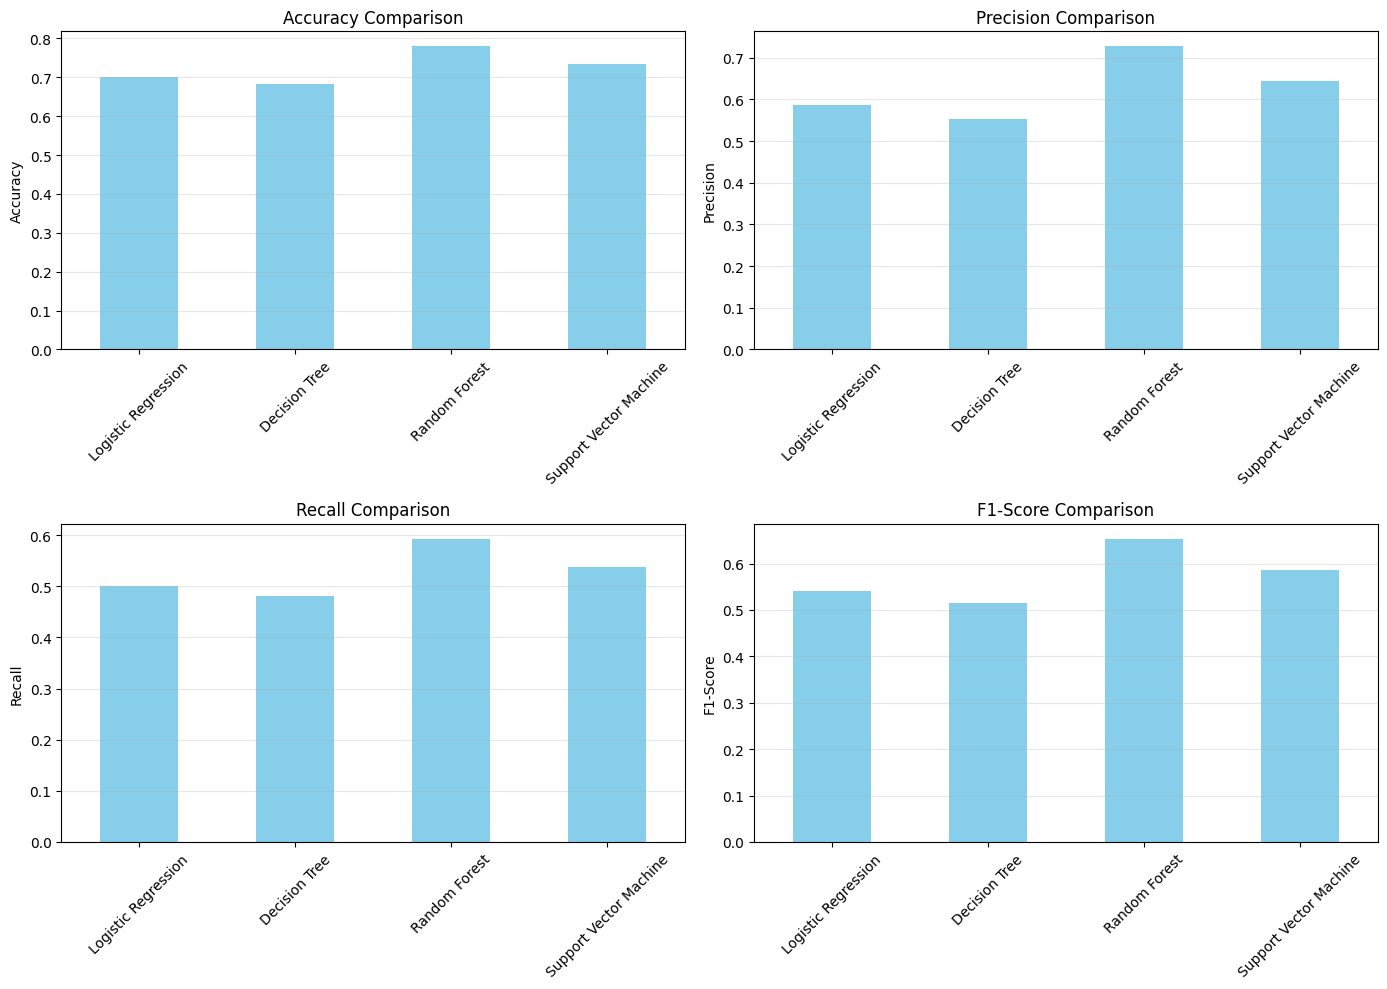


Best performing model: Random Forest
F1-Score: 0.6531


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Load data (replace with your actual CSV file path or dataframe)
# For demo, load from sklearn diabetes dataset (binary classification example)
# If you have CSV, use: df = pd.read_csv('your_file.csv')
# Here, using the Pima Indians diabetes dataset from URL for demo
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

print(f"Dataset shape: {df.shape}")
print(df.head())

# 2. Replace 0s in some columns with NaN for imputation (0 is invalid for these features)
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# 3. Impute missing values with median
imputer = SimpleImputer(strategy='median')
df[cols_with_zeros] = imputer.fit_transform(df[cols_with_zeros])

# 4. Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 5. Feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Split into training and testing sets (80% train, 20% test), stratify for balanced classes
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# 7. Define machine learning algorithms to compare
algorithms = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# 8. Train, evaluate, and store results
results = {}

print("\n=== MACHINE LEARNING ALGORITHMS COMPARISON ===\n")

for name, model in algorithms.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    print(f"{name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print("-" * 40)

# 9. Summarize results in a DataFrame and plot
comparison_df = pd.DataFrame(results).T
print("\n=== SUMMARY TABLE ===")
print(comparison_df.round(4))

# 10. Plot comparison metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    comparison_df[metric].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_xticklabels(comparison_df.index, rotation=45)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 11. Print best model by F1-Score
best_model = comparison_df['F1-Score'].idxmax()
print(f"\nBest performing model: {best_model}")
print(f"F1-Score: {comparison_df.loc[best_model, 'F1-Score']:.4f}")


## 9. Inferencing


<ipython-input-32-0579ba252cd5>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].replace(0, np.nan)


=== MACHINE LEARNING ALGORITHMS COMPARISON ===

Logistic Regression:
  Accuracy:  0.7078
  Precision: 0.6000
  Recall:    0.5000
  F1-Score:  0.5455
----------------------------------------
Decision Tree:
  Accuracy:  0.6818
  Precision: 0.5532
  Recall:    0.4815
  F1-Score:  0.5149
----------------------------------------
Random Forest:
  Accuracy:  0.7727
  Precision: 0.7021
  Recall:    0.6111
  F1-Score:  0.6535
----------------------------------------
Support Vector Machine:
  Accuracy:  0.7403
  Precision: 0.6522
  Recall:    0.5556
  F1-Score:  0.6000
----------------------------------------

=== SUMMARY TABLE ===
                        Accuracy  Precision  Recall  F1-Score
Logistic Regression       0.7078     0.6000  0.5000    0.5455
Decision Tree             0.6818     0.5532  0.4815    0.5149
Random Forest             0.7727     0.7021  0.6111    0.6535
Support Vector Machine    0.7403     0.6522  0.5556    0.6000

Best performing model: Random Forest
F1-Score: 0.6535

=== 

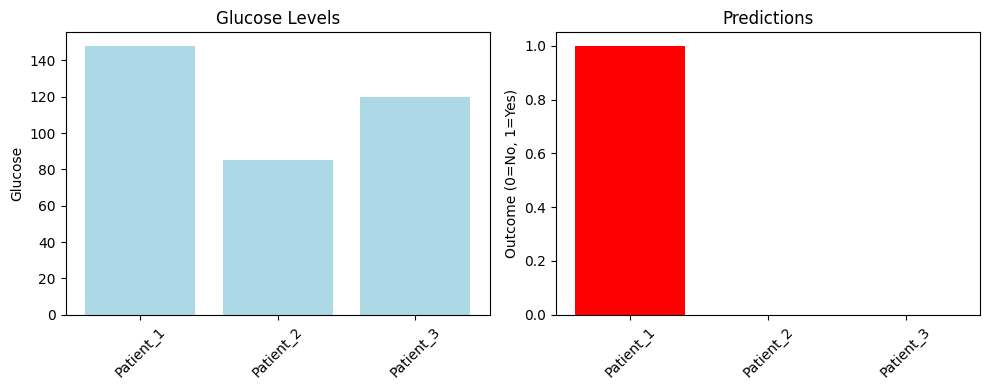


✓ Inferencing complete!


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 1. Load dataset (Pima Indians Diabetes Dataset as example)
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

# Features and target
features = df.columns[:-1].tolist()  # all except 'Outcome'
X = df[features]
y = df['Outcome']

# 2. Replace zeros with np.nan for specific columns (considered missing)
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    X[col] = X[col].replace(0, np.nan)

# 3. Split into train/test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Impute missing values with median on train, then apply to test
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train.values)  # fit on numpy array without columns to avoid errors

X_train_imputed = pd.DataFrame(imputer.transform(X_train.values), columns=features)
X_test_imputed = pd.DataFrame(imputer.transform(X_test.values), columns=features)

# 5. Standardize features
scaler = StandardScaler()
scaler.fit(X_train_imputed.values)

X_train_scaled = pd.DataFrame(scaler.transform(X_train_imputed.values), columns=features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed.values), columns=features)

# 6. Define algorithms to compare
algorithms = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# 7. Train, predict and evaluate each algorithm
results = {}

print("=== MACHINE LEARNING ALGORITHMS COMPARISON ===\n")
for name, model in algorithms.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    print(f"{name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print("-" * 40)

comparison_df = pd.DataFrame(results).T
print("\n=== SUMMARY TABLE ===")
print(comparison_df.round(4))

best_model_name = comparison_df['F1-Score'].idxmax()
print(f"\nBest performing model: {best_model_name}")
print(f"F1-Score: {comparison_df.loc[best_model_name, 'F1-Score']:.4f}")

# 8. Inferencing with new patient data

print("\n=== MODEL INFERENCING ===")
best_model = algorithms[best_model_name]
print(f"Using: {best_model_name}")

# New patient data (same feature order)
new_patients = pd.DataFrame({
    'Pregnancies': [6, 1, 3],
    'Glucose': [148, 85, 120],
    'BloodPressure': [72, 66, 78],
    'SkinThickness': [35, 29, 25],
    'Insulin': [0, 0, 85],
    'BMI': [33.6, 26.6, 28.5],
    'DiabetesPedigreeFunction': [0.627, 0.351, 0.455],
    'Age': [50, 31, 35]
}, index=['Patient_1', 'Patient_2', 'Patient_3'])

print("\nNew patient data:")
print(new_patients)

# Replace zeros with NaN in new data (same columns)
for col in zero_cols:
    new_patients[col] = new_patients[col].replace(0, np.nan)

# Impute missing values using fitted imputer (pass numpy array)
new_imputed = pd.DataFrame(imputer.transform(new_patients.values), columns=features)

# Standardize new data using fitted scaler
new_scaled = pd.DataFrame(scaler.transform(new_imputed.values), columns=features)

# Predict
predictions = best_model.predict(new_scaled)

print("\n=== PREDICTIONS ===")
for i, patient in enumerate(new_patients.index):
    label = "Diabetic" if predictions[i] == 1 else "Non-Diabetic"
    print(f"{patient}: {label}")

# Visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(new_patients.index, new_patients['Glucose'], color='lightblue')
plt.title('Glucose Levels')
plt.ylabel('Glucose')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
colors = ['red' if p == 1 else 'green' for p in predictions]
plt.bar(new_patients.index, predictions, color=colors)
plt.title('Predictions')
plt.ylabel('Outcome (0=No, 1=Yes)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\n✓ Inferencing complete!")
